## Probability Distributions Exercises

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1
A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive-thru window
- How likely is it that the drive-thru gets at least 1 car?

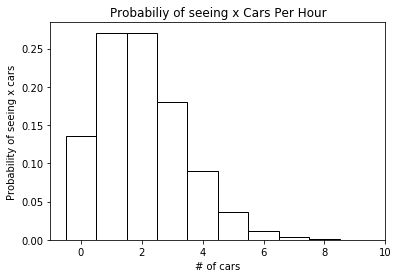

In [2]:
x = range(10)
y = stats.poisson(2).pmf(x)

plt.title("Probabiliy of seeing x Cars Per Hour")
plt.xlabel("# of cars")
plt.ylabel("Probability of seeing x cars")
plt.bar(x, y, color="white", edgecolor="black", width=1)
plt.show()

In [3]:
per_hour = 2

# What is the probability that no cars drive up in the noon hour?
# .pmf here b/c we have a discrete number. we don't have 2.222 cars
theory = stats.poisson(per_hour).pmf(0)
simulated = (stats.poisson(per_hour).rvs(10_000) == 0).mean()

theory, simulated

(0.1353352832366127, 0.1373)

In [4]:
# What is the probability that 3 or more cars come through the drive-thru window
# with discrete numbers, 3 or more means anything over 2, so .sf(2) 

theory = stats.poisson(per_hour).sf(2)
simulated = (stats.poisson(per_hour).rvs(10_000) >= 3).mean()
theory, simulated

(0.32332358381693654, 0.3213)

In [5]:
# How likely is it that the drive-thru gets at least 1 car?
theory = stats.poisson(per_hour).sf(0)
simulated = (stats.poisson(per_hour).rvs(10_000) >= 1).mean()
theory, simulated

(0.8646647167633873, 0.8691)

## Exercise 2
Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

In [6]:
mean = 3.0
std = 0.3
# What grade point average is required to be in the top 5% of the graduating class?
# "greater than" means it's survival function or inverse survival function
# Because we have percentage and want the value, we use .isf
grade_distribution = stats.norm(mean, std)
theory = grade_distribution.isf(.05)
simulated = np.percentile(grade_distribution.rvs(10_000), 95)

theory, simulated

(3.4934560880854417, 3.4994724575388525)

In [7]:
# What GPA constitutes the bottom 15% of the class?
# What we have is the percentage
# What we want is the grade
# And we want to know 15% or lower
# That's .ppf

theory = grade_distribution.ppf(.15)
simulated = np.percentile(grade_distribution.rvs(10_000), 15)
theory, simulated

(2.689069983151863, 2.6893994522931837)

In [8]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. 
# Third decile means 30% and lower b/c deciles are 10% intervals
# Would a student with a 2.8 grade point average qualify for this scholarship?
# "Less than" a threshold is .cdf or .ppf
gpa = 2.8
theory = grade_distribution.ppf(.3)
simulated = np.percentile(grade_distribution.rvs(10_000), 30)
results = np.array([theory, simulated])
# Is a GPA of 2.8 in the bottom 30% of grades in theory or simulated?
results < gpa

array([False, False])

In [9]:
# If I have a GPA of 3.5, what percentile am I in?
# Percentile means at or below a level, so we use .cdf
theory = grade_distribution.cdf(3.5)
simulated = (grade_distribution.rvs(10_000) <= 3.5).mean()
theory, simulated

(0.9522096477271853, 0.9544)

## Exercise 3

- A marketing website has an average click-through rate of 2%. 
- One day they observe 4326 visitors and 97 click-throughs. 
- How likely is it that this many people or more click through?

In [10]:
# How likely is is that this many or more click through"
# This many or more is survival function
clicks_distribution = stats.poisson(.02)
today = 97 / 4326

theory = clicks_distribution.sf(today)
simulation = (clicks_distribution.rvs(100_000) >= today).mean()
theory, simulation

(0.0198013266932447, 0.01956)

## Exercise 4
You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. 

Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

In [11]:
# Binomial b/c we're correct or not
n = 60
probability = .01
theory = stats.binom(n, probability).sf(0)

simulation = (stats.binom(n, probability).rvs(10_000) > 0).mean()

theory, simulation

(0.4528433576092388, 0.4568)

## Exercise 5
- Suppose that there's a 3% chance that any one student cleans the break area when they visit it
- On any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
- How likely is it that the break area gets cleaned up each day? 
- How likely is it that it goes two days without getting cleaned up? 
- All week?



In [12]:
# How likely is it that the break area gets cleaned up each day?
n_students = round(.9 * 3 * 22)

# "Greater than" is our signal to use .sf or .isf
# Greater than 0 means someone cleaned up 
theory = stats.binom(n_students, .03).sf(0)

simulation = (stats.binom(n_students, .03).rvs(100_000) > 0).mean()
theory, simulation

(0.8342199288437355, 0.83442)

In [13]:
# How likely is it that it goes two days without getting cleaned up?
n_days = 2
theory ** n_days, simulation ** n_days

(0.6959228896800471, 0.6962567364000001)

In [14]:
# All week?
n_days = 5
theory ** n_days, simulation ** n_days

(0.404019942874891, 0.40450465629335686)

In [15]:
# All week w/ .sf
stats.binom(5, theory).sf(4)

0.404019942874891

## Exercise 6

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 

After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 

If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 

Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.


In [16]:
# need 2 mins to order, 10 minutes to get order, and 15 minutes to eat
time_to_order_and_eat = 2 + 10 + 15
time_for_lunch = 60
max_time_to_wait = time_for_lunch - time_to_order_and_eat
max_time_to_wait

33

In [17]:
# .cdf b/c we want a given wait time or less
avg_wait = 15 * 2 # average wait time for 2 people
sd = 3 * 2 # standard deviation for 2 people
theory = stats.norm(avg_wait, sd).cdf(max_time_to_wait)

simulated = (stats.norm(avg_wait, sd).rvs(10_000) <= max_time_to_wait).mean()
theory, simulated

(0.6914624612740131, 0.6909)

## Exercise 7
Connect to the employees database. 
- Find the average salary of current employees
- Find the standard deviation. 

- Model the distribution of employees salaries with a normal distribution and answer the following questions:
    - What percent of employees earn less than 60,000?
    - What percent of employees earn more than 95,000?
    - What percent of employees earn between 65,000 and 80,000?
    - What do the top 5% of employees make?

In [18]:
from env import get_url
query = """
    select emp_no, salary from salaries 
    join dept_emp using(emp_no)
    where salaries.to_date > curdate() 
    and dept_emp.to_date > curdate()
    """

url = get_url("employees")
                        
# df holds current employees
df = pd.read_sql(query, url)
salaries = df.set_index("emp_no")

In [19]:
avg = salaries.mean()["salary"]
stdev = salaries.std()["salary"]
avg, stdev

(72012.23585730705, 17309.995380252043)

In [20]:
# What percentage of employees earn less than 60,000
theory = stats.norm(avg, stdev).cdf(60_000)
actual = (salaries < 60_000).mean()["salary"]
theory, actual

(0.24385742480214506, 0.2705727041028802)

In [21]:
# What percentage of employees earn more than 95,000?

theory = stats.norm(avg, stdev).sf(95_000)
actual = (salaries > 95_000).mean()["salary"]
theory, actual

(0.0920881919980413, 0.1086272092752078)

In [22]:
# What percent of employees earn between 65,000 and 80,000?
actual = ((salaries < 80_000) & (salaries > 65_000)).mean()["salary"]

# .sf for above
# % above 65 minus % above 80
above_65 = stats.norm(avg, stdev).sf(65_000)
above_80 = stats.norm(avg, stdev).sf(80_000)
theory = above_65 - above_80
theory

theory, actual

(0.3350605685446655, 0.325107028035515)

In [23]:
# What do the top 5% of employees make?
# We're looking for probability of x and greater
# And we have the percentage and want that cutoff, so .isf
theory = stats.norm(avg, stdev).isf(.05)
actual = salaries.quantile(.95)["salary"]

theory, actual

(100484.64454102787, 104225.84999999998)

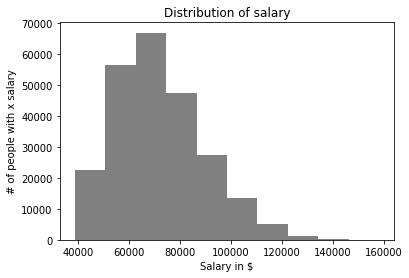

In [24]:
x = np.array(salaries.salary)

plt.title("Distribution of salary")
plt.ylabel("# of people with x salary")
plt.xlabel("Salary in $")
plt.hist(x, color="gray")
plt.show()